## KNN para Regresión

Los siguientes son los pasos para la Regresión K-NN:

1. Encontrar los k vecinos más cercanos basados en distancias para x.
2. Promediar la salida de los K vecinos más cercanos de x.

### Importamos las bibliotecas necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Cargamos el dataset

El dataset puede consultarse [aquí](https://www.kaggle.com/datasets/ishaanv/ISLR-Auto).

In [2]:
publicidad_ruta = "https://raw.githubusercontent.com/vbatiz/intro-ML/main/notebooks/datasets/advertising.csv"
df_publicidad = pd.read_csv(publicidad_ruta, index_col=0)
df_publicidad.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df_publicidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
df_publicidad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df_publicidad.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
df_publicidad.shape

(200, 4)

In [7]:
df_publicidad = df_publicidad.dropna(axis=0)

### Definimos la variable dependiente (y). Es el valor a predecir.

In [8]:
y = df_publicidad.Sales
print(y)

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64


### Elegimos la(s) variable(s) independiente(s) o x. Son las características (features) a utilizar como predictores.

In [9]:
#publicidad_caracteristicas = ["TV"]
publicidad_caracteristicas = ["TV","Radio","Newspaper"]
x = df_publicidad[publicidad_caracteristicas]
print(x)

        TV  Radio  Newspaper
1    230.1   37.8       69.2
2     44.5   39.3       45.1
3     17.2   45.9       69.3
4    151.5   41.3       58.5
5    180.8   10.8       58.4
..     ...    ...        ...
196   38.2    3.7       13.8
197   94.2    4.9        8.1
198  177.0    9.3        6.4
199  283.6   42.0       66.2
200  232.1    8.6        8.7

[200 rows x 3 columns]


### Graficamos la relación ente X y Y. Usar cuando solo estemos utilizando una variable X.

In [ ]:
# Usar cuando X sea una sola variable
plt.scatter(x, y)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Publicidad vs Ventas")
plt.show()

### Creamos los conjuntos de entrenamiento y prueba

In [11]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [12]:
x_test.head()

,TV,Radio,Newspaper
96,163.3,31.6,52.9
16,195.4,47.7,52.9
31,292.9,28.3,43.2
159,11.7,36.9,45.2
129,220.3,49.0,3.2


### Realizamos la prueba del codo para determinar la mejor K (Elbow test)

K: 1, MSE: 2.8220000000000005
K: 2, MSE: 2.5949999999999998
K: 3, MSE: 2.5578703703703707
K: 4, MSE: 2.4977604166666665
K: 5, MSE: 2.523600000000001
K: 6, MSE: 2.309458333333333
K: 7, MSE: 2.3149455782312924
K: 8, MSE: 2.59459375
K: 9, MSE: 2.6853724279835394
K: 10, MSE: 2.792148333333333


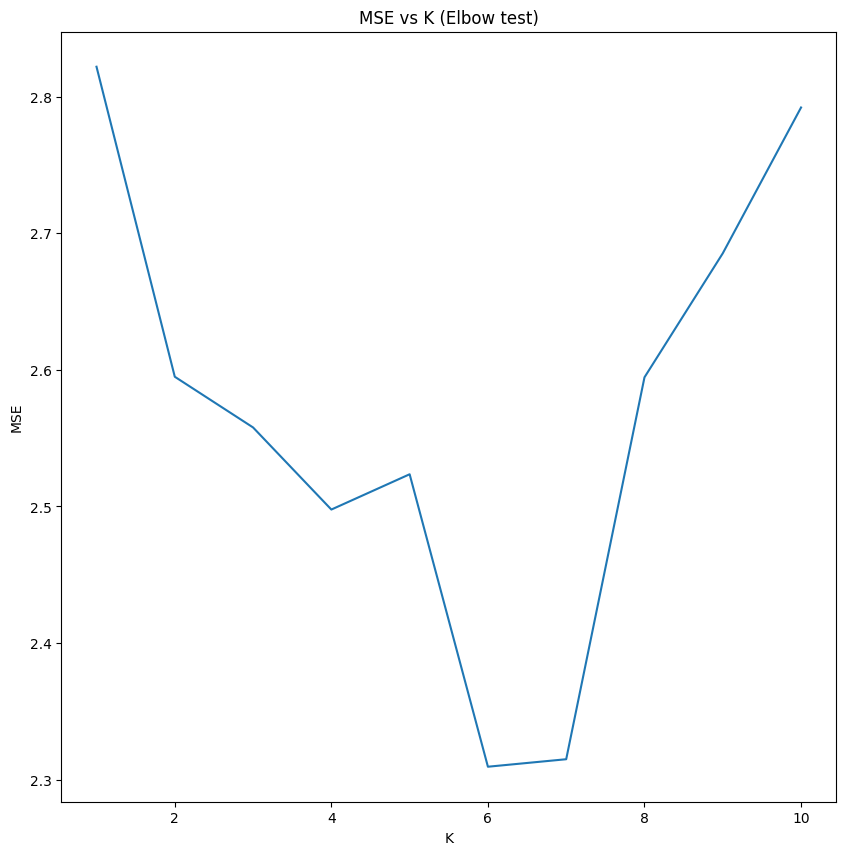

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
k_list = range(1,11,1)
knn_dict = {}
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    modelo_knn = knn.fit(x_train, y_train) # se entrena con el conjunto de entrenamiento

    y_pred = modelo_knn.predict(x_test) # realiza predicciones con el conjunto de prueba

    mse = mean_squared_error(y_test, y_pred) # calcula el error cuadrático medio
    #r2 = r2_score(y_test, y_pred) # calcula el coeficiente de determinación
    knn_dict[k] = mse
    print(f"K: {k}, MSE: {mse}")
ax.plot(knn_dict.keys(), knn_dict.values())
ax.set_xlabel("K")
ax.set_ylabel("MSE")
ax.set_title("MSE vs K (Elbow test)")
plt.show()

### Creamos el modelo con el mejor valor de K

In [16]:
# Creamos el modelo con el mejor valor de K
knn = KNeighborsRegressor(n_neighbors=6)
modelo_knn = knn.fit(x_train, y_train)
y_knn_pred = modelo_knn.predict(x_test)
mse = mean_squared_error(y_test, y_knn_pred)
print(f"MSE: {mse}")

MSE: 2.309458333333333


### Probamos el modelo con Datos reales

In [17]:
#Solicitamos al usuario los valores

tv = float(input("Inversión TV: "))
radio = float(input("Inversión Radio: "))
newspaper = float(input("Inversión Newspaper: "))

### Creamos el dataset de entrada

In [18]:
# Creamos el dataset de entrada
dict = {'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]}
df = pd.DataFrame(dict)
df.head()

,TV,Radio,Newspaper
0,160.0,30.0,25.0


### Realizamos la predicción

In [20]:
resultado = modelo_knn.predict(df)
print(f"Con una inversión en TV de {tv}, en radio de {radio} y en periódico de {newspaper} se pronostica una venta de: {resultado[0]}")

Con una inversión en TV de 160.0, en radio de 30.0 y en periódico de 25.0 se pronostica una venta de: 16.016666666666666
